# Used Car Dataset Project


This project is intended to demonstrate my Data Science skills by following the Data Science Method

## Problem Identification 
Identify the correct problem to solve

 Problem Identification
● Problem statement formation
● Context
● Criteria for success
● Scope of solution space
● Constraints
● Stakeholders
● Data sources

Here are some questions to consider to help you get started:
● What is the problem you want to solve?

Create a model that lets a local used car company determine the best cars to focus keep in their inventory to make the most sales based on their location.

● Who is your client and why do they care about this problem? In other words, what will
your client do or decide based on your analysis?

My client is a local used car company that buys used cars from auctions and individual sellers, fixes them up, and resells them. They will use my analysis to help make their inventory more applicable

● What data are you using? How will you acquire the data?

I am using data from Craigslist via a dataset found on Kaggle:
https://www.kaggle.com/austinreese/craigslist-carstrucks-data

● Briefly outline how you’ll solve this problem. Your approach may change later, but this is
a good first step to get you thinking about a method and solution.

First i need to download the dataset and use my technical knowledge to get a feel for the dataset and clean it up then i can start to analyze it and start focusing on documenting any interesting finds in general and then focus on the solving the issue which is “which cars should be added to the inventory to drive sales based on location?” and then create a model to predict the probability of interest in selling a car based on the features of the car and the location.


● What are your deliverables? Typically, this includes code, a paper, or a slide deck. For this
capstone, the deliverables include:

Deliver a summary, a slide deck, a notebook, and a model. I then want to find an actual local car company and present it as if I was a consultant for them.


○ A GitHub repo containing the work you complete for each step of the project,
Including:


■ A slide deck
■ A project report

Problem Statement for Used Car Price Prediction
We will make a project for Used Care price prediction. The problem statement is that if any user wants to buy a used car then our application should be compatible to provide a tentative price of car according to the user configurations. Although it looks like a simple project or just developing a model, the dataset we have is noisy and needs lots of feature engineering, and preprocessing that will drive your interest in developing this project.

Describing Problem Statement
Overview about dataset
Data Cleaning
Exploratory Data Analysis
Feature Engineering
Machine learning Modeling
ML web app development
Deployment Machine learning app

## Imports

In [5]:
#Importing the packages I will use
import pandas as pd #to work with dataframes
import numpy as np #to work with numpy arrays
import seaborn as sns #for visualizing
import matplotlib.pyplot as plt #for making plots
import statsmodels.api as sm # What does this do? Find out and type here.
from statsmodels.graphics.api import abline_plot # For visualling evaluating predictions.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split # For splitting the data.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime
import pickle
import re #regular expressions

## Data Wrangling 
Collect, organize, define, and clean a relevant datase

First thing to do is import the dataset and get a feel for it.

In [6]:
#loading the dataset as a pandas dataframe
data_raw=pd.read_csv('../data/raw/vehicles.csv')

In [7]:
#let's look at some rows
data_raw.sample(7)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
73773,7312139186,https://cosprings.craigslist.org/ctd/d/oak-gro...,colorado springs,https://cosprings.craigslist.org,24950,2008.0,ram,3500,excellent,8 cylinders,...,NaN,truck,NaN,https://images.craigslist.org/00p0p_iq1mI2x07S...,"6.7L Cummins Turbo diesel, automatic transmiss...",NaN,co,38.998500,-94.139900,2021-04-24T17:25:21-0600
301753,7314433171,https://toledo.craigslist.org/ctd/d/perrysburg...,toledo,https://toledo.craigslist.org,4995,2009.0,subaru,forester,good,4 cylinders,...,full-size,SUV,blue,https://images.craigslist.org/00m0m_eJ7sEKCSVo...,ALL WHEEL DRIVE VERY CLEAN CALL 419-297-9709 ...,NaN,oh,41.522746,-83.537369,2021-04-29T14:23:23-0400
342910,7309911046,https://providence.craigslist.org/ctd/d/provid...,rhode island,https://providence.craigslist.org,22590,2013.0,infiniti,jx jx35 sport utility,good,6 cylinders,...,NaN,other,silver,https://images.craigslist.org/00S0S_h8wM6cLKu8...,Carvana is the safer way to buy a car During t...,NaN,ri,41.820000,-71.410000,2021-04-20T13:40:51-0400
338549,7311872097,https://poconos.craigslist.org/ctd/d/pocono-pi...,poconos,https://poconos.craigslist.org,25990,2019.0,ram,1500 classic regular cab,good,8 cylinders,...,NaN,pickup,white,https://images.craigslist.org/00E0E_ibD9dHEQFG...,Carvana is the safer way to buy a car During t...,NaN,pa,41.110000,-75.450000,2021-04-24T11:31:17-0400
43963,7316831198,https://palmsprings.craigslist.org/cto/d/thous...,palm springs,https://palmsprings.craigslist.org,44000,1986.0,jeep,cj7,excellent,8 cylinders,...,full-size,SUV,brown,https://images.craigslist.org/01515_a13j7GSgF2...,"1986 CJ7 , custom paint, 350 chevy 400 turbo t...",NaN,ca,33.808200,-116.371300,2021-05-04T10:56:51-0700
267828,7306111178,https://buffalo.craigslist.org/ctd/d/tonawanda...,buffalo,https://buffalo.craigslist.org,15499,2013.0,cadillac,srx luxury collection,excellent,6 cylinders,...,mid-size,SUV,white,https://images.craigslist.org/00Z0Z_gzLaryENJw...,This 2013 Cadillac SRX is an exceptionally cle...,NaN,ny,42.989691,-78.873274,2021-04-13T09:53:52-0400
96667,7304081054,https://fortmyers.craigslist.org/lee/ctd/d/for...,ft myers / SW florida,https://fortmyers.craigslist.org,7900,2007.0,mercedes-benz,benz c280,excellent,6 cylinders,...,mid-size,sedan,white,https://images.craigslist.org/00u0u_jaw2FwaIjm...,We have a beautiful white Mercedes Benz C280 V...,NaN,fl,26.502500,-81.927600,2021-04-09T08:39:34-0400


I see some NaN values in several of the columns, so I will need to address that. I see that there are 26 columns. Let's do a little more looking.

In [8]:
data_raw.shape

(426880, 26)

Wow! Over 426,000 rows and 26 columns

In [5]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

Looking at the columns and guessing what each one is, it would make more sense for the year to be an int instead of a float. county is showing as a float, which is weird. posting date is showing as an object instead of a date, need to look at that.

Before I fix the rows, I was to remove any columns that don't have any value to the business problem. I don't think id or url have any bearing. I need to see what some of them are that aren't obvious.

In [6]:
#examine columns
data_raw[~data_raw.isna().any(axis=1)]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date


Empty...hmmm....one of the columns must be completely NaaN

In [7]:
#Count (using `.sum()`) the number of missing values (`.isnull()`) in each column of 
#uc as well as the percentages (using `.mean()` instead of `.sum()`).
#Order them (increasing or decreasing) using sort_values
#Call `pd.concat` to present these in a single table (DataFrame) with the helpful column names 'count' and '%'
missing = pd.concat([data_raw.isnull().sum(),100 * data_raw.isnull().mean()], axis=1)
missing.columns=['count','%']
missing.sort_values(by='count',ascending=False)

,count,%
county,426880,100.000000
size,306361,71.767476
cylinders,177678,41.622470
condition,174104,40.785232
VIN,161042,37.725356
drive,130567,30.586347
paint_color,130203,30.501078
type,92858,21.752717
manufacturer,17646,4.133714
title_status,8242,1.930753


aha, looks like county needs to be dropped immediately

In [8]:
data_raw.drop(columns=['county'],inplace=True)
data_raw.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'state', 'lat', 'long', 'posting_date'],
      dtype='object')

In [9]:
#examine columns with data
data_raw[~data_raw.isna().any(axis=1)].T

,126,127,128,215,219,268,337,338,346,355,...,426780,426782,426783,426784,426785,426788,426792,426793,426833,426836
id,7305672709,7305672266,7305672252,7316482063,7316429417,7315946365,7315354216,7315349921,7315259946,7315110575,...,7303328817,7303328786,7303328773,7303328776,7303314912,7303227528,7303114896,7303112347,7302338378,7302301268
url,https://auburn.craigslist.org/ctd/d/ozark-2018...,https://auburn.craigslist.org/ctd/d/ozark-2019...,https://auburn.craigslist.org/ctd/d/ozark-2018...,https://bham.craigslist.org/ctd/d/powder-sprin...,https://bham.craigslist.org/cto/d/birmingham-1...,https://bham.craigslist.org/cto/d/bessemer-200...,https://bham.craigslist.org/cto/d/marietta-201...,https://bham.craigslist.org/cto/d/birmingham-1...,https://bham.craigslist.org/ctd/d/cleveland-20...,https://bham.craigslist.org/ctd/d/siluria-2008...,...,https://wyoming.craigslist.org/ctd/d/saddlestr...,https://wyoming.craigslist.org/ctd/d/saddlestr...,https://wyoming.craigslist.org/ctd/d/saddlestr...,https://wyoming.craigslist.org/ctd/d/saddlestr...,https://wyoming.craigslist.org/ctd/d/billings-...,https://wyoming.craigslist.org/ctd/d/billings-...,https://wyoming.craigslist.org/ctd/d/cheyenne-...,https://wyoming.craigslist.org/ctd/d/cheyenne-...,https://wyoming.craigslist.org/cto/d/kirby-jag...,https://wyoming.craigslist.org/ctd/d/dassel-20...
region,auburn,auburn,auburn,birmingham,birmingham,birmingham,birmingham,birmingham,birmingham,birmingham,...,wyoming,wyoming,wyoming,wyoming,wyoming,wyoming,wyoming,wyoming,wyoming,wyoming
region_url,https://auburn.craigslist.org,https://auburn.craigslist.org,https://auburn.craigslist.org,https://bham.craigslist.org,https://bham.craigslist.org,https://bham.craigslist.org,https://bham.craigslist.org,https://bham.craigslist.org,https://bham.craigslist.org,https://bham.craigslist.org,...,https://wyoming.craigslist.org,https://wyoming.craigslist.org,https://wyoming.craigslist.org,https://wyoming.craigslist.org,https://wyoming.craigslist.org,https://wyoming.craigslist.org,https://wyoming.craigslist.org,https://wyoming.craigslist.org,https://wyoming.craigslist.org,https://wyoming.craigslist.org
price,0,0,0,4000,2500,9000,8950,4000,98900,9400,...,34995,23995,15999,24995,23495,12995,32999,15999,6800,0
year,2018.0,2019.0,2018.0,2002.0,1995.0,2008.0,2011.0,1972.0,2001.0,2008.0,...,2014.0,2013.0,2000.0,2014.0,2015.0,2016.0,2014.0,2018.0,1997.0,2018.0
manufacturer,chevrolet,chevrolet,chevrolet,toyota,bmw,mazda,ford,mercedes-benz,ferrari,mercedes-benz,...,gmc,toyota,ram,gmc,ford,chevrolet,ford,chevrolet,jaguar,ram
model,express cargo van,express cargo van,express cargo van,echo,525i,miata mx-5,f-150,benz,360 modena,benz c350,...,sierra,tundra,3500,sierra,f150 xlt 4x4,cruze lt,"f350, xlt","cruze, lt",xk8 convertible,2500
condition,like new,like new,like new,excellent,fair,excellent,excellent,fair,good,good,...,good,good,good,good,like new,like new,excellent,excellent,good,excellent
cylinders,6 cylinders,6 cylinders,6 cylinders,4 cylinders,6 cylinders,4 cylinders,6 cylinders,6 cylinders,8 cylinders,6 cylinders,...,8 cylinders,8 cylinders,6 cylinders,8 cylinders,8 cylinders,4 cylinders,8 cylinders,4 cylinders,8 cylinders,6 cylinders


id and url appear useless, region looks ok, region_url is useless, price, not sure why some are 0, need to address that, year has a .0 on it, manufacturer, model,condition, cylinders, fuel are categories, odometer is quantitative, title, transmission are category, vin is useless, size type, color are categorical, image is useless for us at this point, description can be used to fill in missing values, state is fin, lat and long are pointless at this point, posting date could be usefull

dropping
id, url, regioni_rul, vin,image_url,lat,long

at some point I guess we could redo the image_url column to a present or not to see if it had effect on the price or something...we could also use lat and long to make a map of where each car is located.....

In [10]:
data_raw

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,fwd,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,fwd,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [11]:
#subsetting useless columns - c1 first cleaning
data_c1=data_raw.loc[:,~data_raw.columns.isin(['id','url','region_url','VIN','image_url','lat','long'])]
data_c1.shape

(426880, 18)

Check for and drop duplicates - c2 second cleaning

In [12]:
data_c1.duplicated().sum()  #duplicated() function checks for duplicates

20

In [13]:
data_c2=data_c1.drop_duplicates(keep='first') #drop_duplicates() is used to drop all the duplicate entries in our dataframe
data_c2.shape

(426860, 18)

looks like we lost 20 rows

In [14]:
data_c1[~data_c1.isna().any(axis=1)].T

,31,55,59,65,73,86,110,119,126,127,...,426784,426785,426788,426792,426793,426808,426809,426831,426833,426836
region,auburn,auburn,auburn,auburn,auburn,auburn,auburn,auburn,auburn,auburn,...,wyoming,wyoming,wyoming,wyoming,wyoming,wyoming,wyoming,wyoming,wyoming,wyoming
price,15000,19900,14000,22500,15000,3000,9500,17500,0,0,...,24995,23495,12995,32999,15999,18000,18000,9800,6800,0
year,2013.0,2004.0,2012.0,2001.0,2017.0,2004.0,2003.0,2008.0,2018.0,2019.0,...,2014.0,2015.0,2016.0,2014.0,2018.0,2005.0,1990.0,1985.0,1997.0,2018.0
manufacturer,ford,ford,honda,ford,dodge,chrysler,chrysler,toyota,chevrolet,chevrolet,...,gmc,ford,chevrolet,ford,chevrolet,chevrolet,jeep,nissan,jaguar,ram
model,f-150 xlt,f250 super duty,odyssey,f450,charger rt 4dr sedan,town & country,town & country,fj cruiser,express cargo van,express cargo van,...,sierra,f150 xlt 4x4,cruze lt,"f350, xlt","cruze, lt",silverado 1500 lt 4x4,gand wagoneer,300zx coupe with t-tops,xk8 convertible,2500
condition,excellent,good,excellent,good,excellent,good,excellent,good,like new,like new,...,good,like new,like new,excellent,excellent,excellent,good,like new,good,excellent
cylinders,6 cylinders,8 cylinders,6 cylinders,8 cylinders,8 cylinders,6 cylinders,6 cylinders,6 cylinders,6 cylinders,6 cylinders,...,8 cylinders,8 cylinders,4 cylinders,8 cylinders,4 cylinders,8 cylinders,8 cylinders,6 cylinders,8 cylinders,6 cylinders
fuel,gas,diesel,gas,diesel,gas,gas,gas,gas,gas,gas,...,gas,gas,gas,diesel,gas,gas,gas,gas,gas,diesel
odometer,128000.0,88000.0,95000.0,144700.0,90000.0,176144.0,30376.0,201300.0,68472.0,69125.0,...,128722.0,146795.0,61127.0,154642.0,36465.0,130000.0,114400.0,115000.0,69550.0,20492.0
title_status,clean,clean,clean,clean,rebuilt,clean,clean,clean,clean,clean,...,clean,clean,clean,clean,clean,lien,clean,clean,clean,clean


Now that we have a dataset that only has relevant values, let's look again at the missing values and weird stuff

In [15]:
#Count (using `.sum()`) the number of missing values (`.isnull()`) in each column of 
#uc as well as the percentages (using `.mean()` instead of `.sum()`).
#Order them (increasing or decreasing) using sort_values
#Call `pd.concat` to present these in a single table (DataFrame) with the helpful column names 'count' and '%'
missing = pd.concat([data_c1.isnull().sum(),100 * data_c1.isnull().mean()], axis=1)
missing.columns=['count','%']
missing.sort_values(by='count',ascending=False)

,count,%
size,306361,71.767476
cylinders,177678,41.622470
condition,174104,40.785232
drive,130567,30.586347
paint_color,130203,30.501078
type,92858,21.752717
manufacturer,17646,4.133714
title_status,8242,1.930753
model,5277,1.236179
odometer,4400,1.030735


let's see what is in the description to add to any missing values

The next part comes from https://towardsdatascience.com/end-to-end-data-science-project-predicting-used-car-prices-using-regression-1b12386c69c8

In [16]:
import re

manufacturer = '(gmc | hyundai | toyota | mitsubishi | ford | chevrolet | ram | buick | jeep | dodge | subaru | nissan | audi | rover  | lexus \
| honda | chrysler | mini | pontiac | mercedes-benz | cadillac | bmw | kia | volvo | volkswagen | jaguar | acura | saturn | mazda | \
mercury | lincoln | infiniti | ferrari | fiat | tesla | land rover | harley-davidson | datsun | alfa-romeo | morgan | aston-martin | porche \
| hennessey)'
condition = '(excellent | good | fair | like new | salvage | new)'
fuel = '(gas | hybrid | diesel |electric)'
title_status = '(clean | lien | rebuilt | salvage | missing | parts only)'
transmission = '(automatic | manual)'
drive = '(4x4 | awd | fwd | rwd | 4wd)'
size = '(mid-size | full-size | compact | sub-compact)'
type_ = '(sedan | truck | SUV | mini-van | wagon | hatchback | coupe | pickup | convertible | van | bus | offroad)'
paint_color = '(red | grey | blue | white | custom | silver | brown | black | purple | green | orange | yellow)'
cylinders = '(\s[1-9] cylinders? |\s1[0-6]? cylinders?)'

keys =    ['manufacturer', 'condition', 'fuel', 'title_status', 'transmission', 'drive','size', 'type', 'paint_color' , 'cylinders']
columns = [ manufacturer,   condition,   fuel,  title_status, transmission ,drive, size, type_, paint_color,   cylinders]

for i,column in zip(keys,columns):
    data_c2[i] = data_c2[i].fillna(
      data_c2['description'].str.extract(column, flags=re.IGNORECASE, expand=False)).str.lower()

data_c3=data_c2.drop('description', axis=1)

C:\Users\ALW-HP~1\AppData\Local\Temp/ipykernel_11732/958322360.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_c2[i] = data_c2[i].fillna(


In [17]:
data_c3.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,posting_date
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN


Need to strip out white space

In [18]:
columns=['manufacturer', 'condition', 'fuel', 'title_status', 'transmission', 'drive','size', 'type', 'paint_color' , 'cylinders']
for i in columns:
    data_c3[i]=data_c3[i].str.strip()

Let's see what that did for our null values

In [19]:
missing = pd.concat([data_c1.isnull().sum(),100 * data_c1.isnull().mean()], axis=1)
missing.columns=['count','%']
print(missing.sort_values(by='count',ascending=False))
missing = pd.concat([data_c3.isnull().sum(),100 * data_c3.isnull().mean()], axis=1)
missing.columns=['count','%']
print(missing.sort_values(by='count',ascending=False))

               count          %
size          306361  71.767476
cylinders     177678  41.622470
condition     174104  40.785232
drive         130567  30.586347
paint_color   130203  30.501078
type           92858  21.752717
manufacturer   17646   4.133714
title_status    8242   1.930753
model           5277   1.236179
odometer        4400   1.030735
fuel            3013   0.705819
transmission    2556   0.598763
year            1205   0.282281
description       70   0.016398
posting_date      68   0.015930
price              0   0.000000
state              0   0.000000
region             0   0.000000
               count          %
size          288996  67.702760
cylinders     168231  39.411282
drive          98322  23.033782
condition      83314  19.517875
type           57203  13.400881
paint_color    51200  11.994565
manufacturer   12098   2.834185
title_status    6442   1.509160
model           5266   1.233660
odometer        4389   1.028206
fuel            2058   0.482125
transmis

seems to have helped quite a bit

so, let's se what else might be weird

Let's save it so that we don't have to re-run this part everytime

In [20]:
data_c3.to_csv('../data/raw/d3.csv',index=False)

In [21]:
data_c3=pd.read_csv('../data/raw/d3.csv')

Let's revisit the null values

In [37]:
missing = pd.concat([data_c3.isnull().sum(),100 * data_c3.isnull().mean()], axis=1)
missing.columns=['count','%']
print(missing.sort_values(by='count',ascending=False))

               count          %
size          288996  67.702760
cylinders     168231  39.411282
drive          98322  23.033782
condition      83314  19.517875
type           57203  13.400881
paint_color    51200  11.994565
manufacturer   12098   2.834185
title_status    6442   1.509160
model           5266   1.233660
odometer        4389   1.028206
fuel            2058   0.482125
transmission    1627   0.381155
year            1194   0.279717
posting_date      57   0.013353
price              0   0.000000
state              0   0.000000
region             0   0.000000


I want to join a secondary datafram so that we can analyze the sections of the country such as west, east, south, etc.
I found a csv from the US census bureau

In [38]:
states = pd.read_csv('us census bureau regions and divisions.csv')
states

,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific
5,Colorado,CO,West,Mountain
6,Connecticut,CT,Northeast,New England
7,District of Columbia,DC,South,South Atlantic
8,Delaware,DE,South,South Atlantic
9,Florida,FL,South,South Atlantic


We need a column to join on, so let's do that now

In [39]:
states.rename(columns={"State Code":'state'},inplace=True)
states

,State,state,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific
5,Colorado,CO,West,Mountain
6,Connecticut,CT,Northeast,New England
7,District of Columbia,DC,South,South Atlantic
8,Delaware,DE,South,South Atlantic
9,Florida,FL,South,South Atlantic


In [61]:
data_c4=pd.read_csv('../data/raw/d3.csv')

Let's do the merge. c4 for fourth cleaning and joining

In [62]:
data_c5=pd.merge(data_c4,states,how='outer')
data_c5

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,posting_date,State,Region,Division
0,prescott,6000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN,NaN
1,flagstaff / sedona,4850.0,2007.0,honda,odyssey ex,good,6 cylinders,gas,122100.0,clean,automatic,fwd,full-size,mini-van,blue,az,2021-05-04T09:40:28-0700,NaN,NaN,NaN
2,flagstaff / sedona,8000.0,2005.0,ford,f-250 super duty king ranch,fair,8 cylinders,diesel,435000.0,clean,automatic,4wd,NaN,NaN,white,az,2021-05-04T08:06:03-0700,NaN,NaN,NaN
3,flagstaff / sedona,18990.0,2020.0,chevrolet,spark activ hatchback,good,NaN,gas,6395.0,clean,other,fwd,NaN,hatchback,black,az,2021-05-04T06:06:54-0700,NaN,NaN,NaN
4,flagstaff / sedona,32590.0,2015.0,mercedes-benz,gla-class gla 45,good,NaN,gas,34811.0,clean,other,NaN,NaN,other,black,az,2021-05-04T06:06:54-0700,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VT,NaN,Vermont,Northeast,New England
426907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WA,NaN,Washington,West,Pacific
426908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WI,NaN,Wisconsin,Midwest,East North Central
426909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WV,NaN,West Virginia,South,South Atlantic


something don't look right, aha, it looks like the states values are different capitalization

In [63]:
data_c4.state.unique()

array(['az', 'ar', 'fl', 'ma', 'nc', 'ny', 'or', 'pa', 'tx', 'wa', 'wi',
       'al', 'ak', 'ca', 'co', 'ct', 'dc', 'de', 'ga', 'hi', 'id', 'il',
       'in', 'ia', 'ks', 'ky', 'la', 'me', 'md', 'mi', 'mn', 'ms', 'mo',
       'mt', 'ne', 'nv', 'nj', 'nm', 'nh', 'nd', 'oh', 'ok', 'ri', 'sc',
       'sd', 'tn', 'ut', 'vt', 'va', 'wv', 'wy'], dtype=object)

In [43]:
states.state.unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [66]:
data_c4.state=data_c4.state.str.upper()
data_c4.state.unique()

array(['AZ', 'AR', 'FL', 'MA', 'NC', 'NY', 'OR', 'PA', 'TX', 'WA', 'WI',
       'AL', 'AK', 'CA', 'CO', 'CT', 'DC', 'DE', 'GA', 'HI', 'ID', 'IL',
       'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MI', 'MN', 'MS', 'MO',
       'MT', 'NE', 'NV', 'NJ', 'NM', 'NH', 'ND', 'OH', 'OK', 'RI', 'SC',
       'SD', 'TN', 'UT', 'VT', 'VA', 'WV', 'WY'], dtype=object)

In [74]:
data_c5=pd.merge(data_c4,states,how='outer')
data_c5.state.unique().shape

(51,)

Awesome, we have 51 unique states

In [75]:
data_c5.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,posting_date,State,Region,Division
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AZ,NaN,Arizona,West,Mountain
1,flagstaff / sedona,4850,2007.0,honda,odyssey ex,good,6 cylinders,gas,122100.0,clean,automatic,fwd,full-size,mini-van,blue,AZ,2021-05-04T09:40:28-0700,Arizona,West,Mountain
2,flagstaff / sedona,8000,2005.0,ford,f-250 super duty king ranch,fair,8 cylinders,diesel,435000.0,clean,automatic,4wd,NaN,NaN,white,AZ,2021-05-04T08:06:03-0700,Arizona,West,Mountain
3,flagstaff / sedona,18990,2020.0,chevrolet,spark activ hatchback,good,NaN,gas,6395.0,clean,other,fwd,NaN,hatchback,black,AZ,2021-05-04T06:06:54-0700,Arizona,West,Mountain
4,flagstaff / sedona,32590,2015.0,mercedes-benz,gla-class gla 45,good,NaN,gas,34811.0,clean,other,NaN,NaN,other,black,AZ,2021-05-04T06:06:54-0700,Arizona,West,Mountain


Let's rename the columns so they make more sense

In [76]:
data_c5.rename(columns={'region':'state_region','title_status':'title','paint_color':'color','State':'state','Region':'us_region','Division':'division'},inplace=True)
data_c5

,state_region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title,transmission,drive,size,type,color,state,posting_date,state,us_region,division
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AZ,NaN,Arizona,West,Mountain
1,flagstaff / sedona,4850,2007.0,honda,odyssey ex,good,6 cylinders,gas,122100.0,clean,automatic,fwd,full-size,mini-van,blue,AZ,2021-05-04T09:40:28-0700,Arizona,West,Mountain
2,flagstaff / sedona,8000,2005.0,ford,f-250 super duty king ranch,fair,8 cylinders,diesel,435000.0,clean,automatic,4wd,NaN,NaN,white,AZ,2021-05-04T08:06:03-0700,Arizona,West,Mountain
3,flagstaff / sedona,18990,2020.0,chevrolet,spark activ hatchback,good,NaN,gas,6395.0,clean,other,fwd,NaN,hatchback,black,AZ,2021-05-04T06:06:54-0700,Arizona,West,Mountain
4,flagstaff / sedona,32590,2015.0,mercedes-benz,gla-class gla 45,good,NaN,gas,34811.0,clean,other,NaN,NaN,other,black,AZ,2021-05-04T06:06:54-0700,Arizona,West,Mountain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426855,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,red,WY,2021-04-04T03:21:31-0600,Wyoming,West,Mountain
426856,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red,WY,2021-04-04T03:21:29-0600,Wyoming,West,Mountain
426857,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback,white,WY,2021-04-04T03:21:17-0600,Wyoming,West,Mountain
426858,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver,WY,2021-04-04T03:21:11-0600,Wyoming,West,Mountain


In [77]:
df=data_c5

## Exploratory Data Analysis
Understand the relationship between data and features


In [78]:
df.sample(15)

,state_region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title,transmission,drive,size,type,color,state,posting_date,state,us_region,division
87031,bend,9998,2014.0,hyundai,accent,NaN,NaN,gas,37744.0,clean,automatic,NaN,compact,sedan,white,OR,2021-04-15T09:28:31-0700,Oregon,West,Pacific
89798,eugene,4995,2004.0,toyota,corolla s 4dr sedan,NaN,NaN,gas,123888.0,clean,automatic,NaN,NaN,sedan,silver,OR,2021-04-30T13:44:17-0700,Oregon,West,Pacific
212809,SF bay area,17590,2017.0,ford,taurus se sedan 4d,good,6 cylinders,gas,37713.0,clean,other,fwd,NaN,sedan,blue,CA,2021-05-03T12:10:53-0700,California,West,Pacific
29238,sarasota-bradenton,12997,2013.0,ford,explorer,new,6 cylinders,gas,131985.0,clean,automatic,4wd,NaN,suv,white,FL,2021-04-30T11:37:22-0400,Florida,South,South Atlantic
26359,orlando,7997,2014.0,chevrolet,malibu,excellent,NaN,gas,75871.0,clean,automatic,NaN,NaN,sedan,black,FL,2021-04-29T13:30:33-0400,Florida,South,South Atlantic
255960,east idaho,34999,2009.0,ford,f-750,NaN,NaN,diesel,47347.0,clean,automatic,NaN,NaN,other,white,ID,2021-04-16T12:03:44-0600,Idaho,West,Mountain
270236,"st louis, MO",223,2011.0,volkswagen,tiguan,NaN,4 cylinders,gas,126836.0,clean,automatic,4wd,compact,suv,red,IL,2021-04-27T15:03:06-0500,Illinois,Midwest,East North Central
115537,amarillo,28924,2016.0,ram,pickup 1500,NaN,8 cylinders,gas,88906.0,clean,automatic,4wd,full-size,pickup,grey,TX,2021-04-15T13:03:28-0500,Texas,South,West South Central
296276,western KY,28990,2018.0,gmc,acadia sle-2 sport utility,good,6 cylinders,gas,24486.0,clean,other,NaN,NaN,suv,red,KY,2021-04-17T08:21:29-0500,Kentucky,South,East South Central
318047,kalamazoo,17990,2018.0,chevrolet,cruze lt diesel,good,NaN,gas,41076.0,clean,other,fwd,NaN,hatchback,red,MI,2021-04-28T14:31:07-0400,Michigan,Midwest,East North Central


In [79]:
df.columns

Index(['state_region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title', 'transmission', 'drive',
       'size', 'type', 'color', 'state', 'posting_date', 'state', 'us_region',
       'division'],
      dtype='object')

Let's start by looking at features

Numerical Features:

In [85]:
df.price.sort_values()

229404             0
195328             0
195332             0
195334             0
291069             0
             ...    
187778    3009548743
356246    3024942282
241944    3024942282
404883    3736928711
91888     3736928711
Name: price, Length: 426860, dtype: int64

That is weird, the prices are a minimum of 0

In [87]:
print(df.price.describe())

count    4.268600e+05
mean     7.520162e+04
std      1.218257e+07
min      0.000000e+00
25%      5.900000e+03
50%      1.395000e+04
75%      2.648000e+04
max      3.736929e+09
Name: price, dtype: float64


well, since we are trying to track the price....we should probably drop anything that is a zero, because it can't be sold for $0

In [278]:
df1=df[(df['price']!=0)]
df1.price.sort_values()

24615              1
405116             1
405117             1
35604              1
13259              1
             ...    
187778    3009548743
241944    3024942282
356246    3024942282
91888     3736928711
404883    3736928711
Name: price, Length: 393970, dtype: int64

uh oh, looks like there are 1 cars too, that ain't right, let's remove anything under 500

In [279]:
df2=df1[df1['price']>=500]

In [280]:
df2.price.sort_values()

376010           500
2519             500
107021           500
376637           500
235569           500
             ...    
187778    3009548743
356246    3024942282
241944    3024942282
404883    3736928711
91888     3736928711
Name: price, Length: 384772, dtype: int64

awesome, looks like the lowest price is 500

In [281]:
df2.odometer.sort_values()

129706    0.0
206845    0.0
3668      0.0
206841    0.0
206840    0.0
         ... 
420697    NaN
420704    NaN
420933    NaN
420951    NaN
423667    NaN
Name: odometer, Length: 384772, dtype: float64

In [282]:
df2.describe()

,price,year,odometer
count,3.847720e+05,383605.000000,3.826560e+05
mean,8.342275e+04,2010.969221,9.854854e+04
std,1.283155e+07,9.611516,1.926768e+05
min,5.000000e+02,1900.000000,0.000000e+00
25%,7.800000e+03,2008.000000,3.817000e+04
50%,1.590000e+04,2013.000000,8.768400e+04
75%,2.799000e+04,2017.000000,1.360000e+05
max,3.736929e+09,2022.000000,1.000000e+07


In [283]:
df2.price.sort_values()

376010           500
2519             500
107021           500
376637           500
235569           500
             ...    
187778    3009548743
356246    3024942282
241944    3024942282
404883    3736928711
91888     3736928711
Name: price, Length: 384772, dtype: int64

let's do the same for odometer

In [284]:
df3=df2[(df2['odometer']!=0)]
df3.odometer.sort_values()

282094    1.0
262984    1.0
262992    1.0
263006    1.0
263051    1.0
         ... 
420697    NaN
420704    NaN
420933    NaN
420951    NaN
423667    NaN
Name: odometer, Length: 383699, dtype: float64

In [285]:
df3.describe()

,price,year,odometer
count,3.836990e+05,382543.000000,3.815830e+05
mean,8.328936e+04,2010.993138,9.882566e+04
std,1.284793e+07,9.543696,1.928765e+05
min,5.000000e+02,1900.000000,1.000000e+00
25%,7.800000e+03,2008.000000,3.863800e+04
50%,1.592100e+04,2013.000000,8.800000e+04
75%,2.799000e+04,2017.000000,1.361460e+05
max,3.736929e+09,2022.000000,1.000000e+07


In [286]:
df4=df3[df3['odometer']>=10]
df1.odometer.sort_values()

256599    0.0
224272    0.0
308304    0.0
224273    0.0
200379    0.0
         ... 
420697    NaN
420704    NaN
420933    NaN
420951    NaN
423667    NaN
Name: odometer, Length: 393970, dtype: float64

Now the lowest is 10 and the highest is 1 million?

In [287]:
df4.odometer.describe()

count    3.794240e+05
mean     9.938799e+04
std      1.932800e+05
min      1.000000e+01
25%      3.938500e+04
50%      8.851550e+04
75%      1.365890e+05
max      1.000000e+07
Name: odometer, dtype: float64

In [289]:
df4.describe()

,price,year,odometer
count,3.794240e+05,378335.000000,3.794240e+05
mean,8.400145e+04,2011.024933,9.938799e+04
std,1.292010e+07,9.448872,1.932800e+05
min,5.000000e+02,1900.000000,1.000000e+01
25%,7.899000e+03,2008.000000,3.938500e+04
50%,1.595950e+04,2013.000000,8.851550e+04
75%,2.799000e+04,2017.000000,1.365890e+05
max,3.736929e+09,2022.000000,1.000000e+07


let's set that to 300,000

In [290]:
df5=df4[df4['odometer']<=300000]
df1.odometer.sort_values()

256599    0.0
224272    0.0
308304    0.0
224273    0.0
200379    0.0
         ... 
420697    NaN
420704    NaN
420933    NaN
420951    NaN
423667    NaN
Name: odometer, Length: 393970, dtype: float64

In [291]:
df5.describe()

,price,year,odometer
count,3.767030e+05,375630.000000,376703.000000
mean,7.858273e+04,2011.101105,92512.052670
std,1.276228e+07,9.341511,61668.463734
min,5.000000e+02,1900.000000,10.000000
25%,7.900000e+03,2008.000000,39082.000000
50%,1.599000e+04,2013.000000,87844.000000
75%,2.799000e+04,2017.000000,135202.000000
max,3.736929e+09,2022.000000,300000.000000


In [292]:
df5.year.sort_values()

70650     1900.0
192822    1900.0
244881    1900.0
78940     1901.0
368167    1905.0
           ...  
409502       NaN
410098       NaN
410179       NaN
410622       NaN
422292       NaN
Name: year, Length: 376703, dtype: float64

While the first modern car was created in 1886, let's limit the year to 1920 for our analysis

In [294]:
df6=df5[df5['year']>=1920]
df6.year.sort_values()

85039     1920.0
426818    1920.0
325732    1921.0
44256     1921.0
148550    1922.0
           ...  
215980    2022.0
52973     2022.0
141457    2022.0
351690    2022.0
67306     2022.0
Name: year, Length: 375619, dtype: float64

In [295]:
df1=df6

Now that we are done with the numerical features, let's look at categorical

In [296]:
df1.state_region.value_counts(ascending=True)

fort smith, AR            7
west virginia (old)       8
kansas city               9
southwest MS             13
meridian                 19
                       ... 
kansas city, MO        2834
central NJ             2858
grand rapids           2892
jacksonville           2994
columbus               3301
Name: state_region, Length: 404, dtype: int64

In [297]:
df1.manufacturer.value_counts(ascending=True)

porche                 2
land rover            18
aston-martin          21
morgan                40
datsun                59
ferrari              108
harley-davidson      135
fiat                 758
alfa-romeo           829
tesla                837
saturn              1056
mercury             1083
porsche             1270
jaguar              1882
rover               1920
pontiac             2193
mini                2280
mitsubishi          3005
volvo               3215
lincoln             3998
infiniti            4428
mazda               4907
buick               5039
acura               5543
chrysler            5555
cadillac            6351
audi                6997
kia                 7272
lexus               7551
volkswagen          8441
subaru              8743
hyundai             9106
mercedes-benz       9907
dodge              12088
bmw                13327
gmc                15074
ram                15906
jeep               16701
nissan             16872
honda              19229


In [298]:
df1.model.value_counts(ascending=True)

Paige Glenbrook Touring        1
2500 tradesman 4x4 local       1
cherokee limited*              1
r350 awd                       1
explorer limited*              1
                            ... 
silverado                   2660
camry                       2696
1500                        3656
silverado 1500              4259
f-150                       6825
Name: model, Length: 26514, dtype: int64

In [299]:
df1.condition.value_counts(ascending=True)

salvage        1403
fair           8711
like new      21903
new           37947
excellent     98972
good         136475
Name: condition, dtype: int64

In [300]:
df1.cylinders.value_counts(ascending=True)

1 cylinder          1
7 cylinders         1
12 cylinder         1
2 cylinder          1
2 cylinders         2
10 cylinder         4
3 cylinder         26
5 cylinder         72
12 cylinders      187
3 cylinders       564
other             955
10 cylinders     1155
8 cylinder       1398
6 cylinder       1490
5 cylinders      1614
4 cylinder       3502
8 cylinders     64520
4 cylinders     69871
6 cylinders     85299
Name: cylinders, dtype: int64

In [301]:
df1.fuel.value_counts(ascending=True)

electric      1703
hybrid        4785
diesel       24500
other        27216
gas         315738
Name: fuel, dtype: int64

In [302]:
df1.title.value_counts(ascending=True)

parts only       131
missing          628
lien            1396
salvage         3851
rebuilt         7075
clean         357465
Name: title, dtype: int64

In [303]:
df1.transmission.value_counts(ascending=True)

manual        22152
other         60488
automatic    291848
Name: transmission, dtype: int64

In [304]:
df1.drive.value_counts(ascending=True)

4x4      5809
awd      9322
rwd     54092
fwd     97926
4wd    121170
Name: drive, dtype: int64

In [305]:
df1.type.value_counts(ascending=True)

offroad          713
bus              735
mini-van        4452
convertible     7996
van            10128
wagon          10284
hatchback      16062
coupe          18572
other          19397
truck          41639
pickup         42295
suv            73682
sedan          80588
Name: type, dtype: int64

In [306]:
df1.color.value_counts(ascending=True)

purple      699
orange     1980
yellow     2243
brown      6522
custom     7522
green      7531
grey      22391
blue      31328
silver    41949
red       66319
black     67147
white     75023
Name: color, dtype: int64

In [322]:
df1.state.value_counts(ascending=True)

ValueError: Grouper for 'state' not 1-dimensional

Gotta drop that state name column

In [323]:
df2=df1.drop(df1.columns[17],axis=1)
df2

,state_region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title,transmission,drive,size,type,color,posting_date,us_region,division
1,flagstaff / sedona,4850,2007.0,honda,odyssey ex,good,6 cylinders,gas,122100.0,clean,automatic,fwd,full-size,mini-van,blue,2021-05-04T09:40:28-0700,West,Mountain
3,flagstaff / sedona,18990,2020.0,chevrolet,spark activ hatchback,good,NaN,gas,6395.0,clean,other,fwd,NaN,hatchback,black,2021-05-04T06:06:54-0700,West,Mountain
4,flagstaff / sedona,32590,2015.0,mercedes-benz,gla-class gla 45,good,NaN,gas,34811.0,clean,other,NaN,NaN,other,black,2021-05-04T06:06:54-0700,West,Mountain
5,flagstaff / sedona,27590,2011.0,mercedes-benz,cl-class cl 550,good,8 cylinders,gas,61445.0,clean,automatic,NaN,NaN,coupe,silver,2021-05-04T06:07:06-0700,West,Mountain
6,flagstaff / sedona,31990,2017.0,ram,1500 crew cab express pickup,good,8 cylinders,gas,15498.0,clean,other,4wd,NaN,pickup,silver,2021-05-04T06:06:56-0700,West,Mountain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426855,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,red,2021-04-04T03:21:31-0600,West,Mountain
426856,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red,2021-04-04T03:21:29-0600,West,Mountain
426857,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback,white,2021-04-04T03:21:17-0600,West,Mountain
426858,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver,2021-04-04T03:21:11-0600,West,Mountain


In [324]:
df1.posting_date.value_counts(ascending=True)

2021-05-04T09:40:28-0700     1
2021-04-13T09:32:53-0400     1
2021-04-13T09:36:31-0400     1
2021-04-13T09:40:09-0400     1
2021-04-13T09:58:00-0400     1
                            ..
2021-04-27T15:34:58-0400     9
2021-04-29T20:06:09-0500     9
2021-04-16T12:07:56-0500    10
2021-04-13T13:19:15-0500    11
2021-04-23T22:13:05-0400    12
Name: posting_date, Length: 336733, dtype: int64

In [325]:
df1.division.value_counts(ascending=True)

East South Central    19789
New England           22202
West North Central    26973
West South Central    31943
Middle Atlantic       39098
Mountain              39826
East North Central    57027
South Atlantic        66237
Pacific               72524
Name: division, dtype: int64

In [326]:
df1.sample(15).T

,174214,196994,254,358925,209874,249574,328372,277890,172887,30640,133661,289345,299360,240291,107885
state_region,chico,redding,flagstaff / sedona,albuquerque,santa barbara,hawaii,minneapolis / st paul,cedar rapids,bakersfield,sarasota-bradenton,san antonio,manhattan,shreveport,"washington, DC",philadelphia
price,39777,28988,28734,66995,32777,8998,9398,23988,21990,11900,33995,1200,16590,4750,2500
year,2018.0,2008.0,2020.0,2019.0,2018.0,2005.0,2010.0,2016.0,2014.0,2016.0,2020.0,2000.0,2013.0,2008.0,2003.0
manufacturer,chevrolet,ram,chevrolet,chevrolet,volvo,ford,nissan,lincoln,cadillac,volkswagen,ford,dodge,honda,jeep,honda
model,colorado,3500 slt 4x4 mega cab,equinox lt,silverado 2500 ltz,s90 t6 all wheel drive certified,econoline cargo van,murano,mks ecoboost elite,ats 3.6l luxury sedan,beetle coupe,mustang,grand caravan,civic si coupe 2d,patriot 4x4,Accord
condition,NaN,NaN,good,like new,excellent,NaN,new,new,good,new,NaN,good,good,excellent,good
cylinders,NaN,6 cylinders,NaN,8 cylinders,4 cylinder,NaN,6 cylinders,6 cylinders,6 cylinders,4 cylinders,NaN,6 cylinders,NaN,4 cylinders,NaN
fuel,gas,diesel,gas,other,gas,gas,gas,gas,gas,gas,gas,diesel,other,gas,gas
odometer,32602.0,135220.0,10.0,23958.0,34040.0,80000.0,101766.0,32274.0,37433.0,112394.0,1953.0,150000.0,81552.0,155000.0,250000.0
title,clean,clean,clean,clean,clean,clean,clean,clean,clean,clean,clean,clean,clean,clean,clean


In [327]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375619 entries, 1 to 426859
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   state_region  375619 non-null  object 
 1   price         375619 non-null  int64  
 2   year          375619 non-null  float64
 3   manufacturer  365914 non-null  object 
 4   model         371332 non-null  object 
 5   condition     305411 non-null  object 
 6   cylinders     230663 non-null  object 
 7   fuel          373942 non-null  object 
 8   odometer      375619 non-null  float64
 9   title         370546 non-null  object 
 10  transmission  374488 non-null  object 
 11  drive         288319 non-null  object 
 12  size          119447 non-null  object 
 13  type          326543 non-null  object 
 14  color         330654 non-null  object 
 15  state         375619 non-null  object 
 16  posting_date  375619 non-null  object 
 17  state         375619 non-null  object 
 18  us_r

Our numerical columns are price, year, odometer. Which I will focus on first. Then use the features.

In [328]:
df1.describe()

,price,year,odometer
count,3.756190e+05,375619.000000,375619.000000
mean,7.869680e+04,2011.104108,92706.355815
std,1.278068e+07,9.325068,61638.700505
min,5.000000e+02,1920.000000,10.000000
25%,7.900000e+03,2008.000000,39333.500000
50%,1.597600e+04,2013.000000,88000.000000
75%,2.799000e+04,2017.000000,135423.000000
max,3.736929e+09,2022.000000,300000.000000


Those seem a bit off, let's massage it a little

In [329]:
numerical=df1[['price','year','odometer']]
numerical.sort_values('price',ascending=False).head()

,price,year,odometer
404883,3736928711,1999.0,211000.0
91888,3736928711,2007.0,164000.0
356246,3024942282,2000.0,100000.0
241944,3024942282,2000.0,100000.0
187778,3009548743,2021.0,1000.0


we can plot to see outliers

<AxesSubplot:xlabel='odometer', ylabel='Density'>

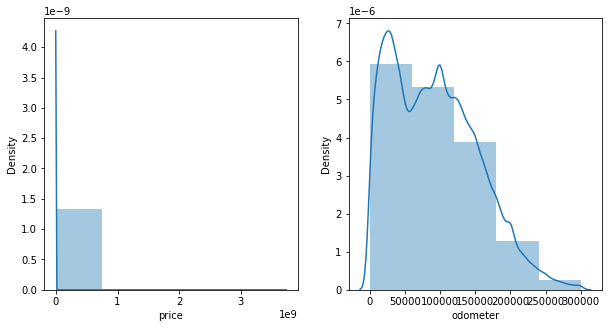

In [330]:
plt.figure(figsize=[10,5])
plt.subplot(121)
sns.distplot(df1['price'],bins=5)
plt.subplot(122)
sns.distplot(df1['odometer'],bins=5)

<AxesSubplot:xlabel='odometer', ylabel='price'>

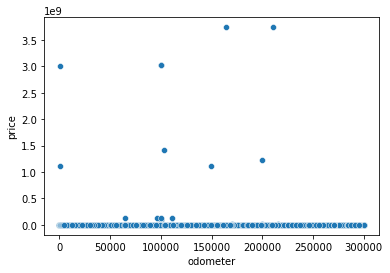

In [331]:
sns.scatterplot(data=df1,x='odometer',y='price')

interesting, i thought that as the odometer increased, price would decrease, but there doesn't seem to be a trend

<AxesSubplot:xlabel='year', ylabel='price'>

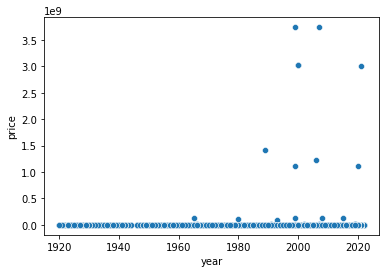

In [332]:
sns.scatterplot(data=df1,x='year',y='price')

same thing, as the year increase i would think price would too, unless we have too many outliers

Let's take a different route, maybe with the us_region to see if we can find anything

In [334]:
cleaned=df1[~df1.isnull().any(axis=1)]
cleaned.sample(15)

,state_region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title,transmission,drive,size,type,color,state,posting_date,state,us_region,division
328955,minneapolis / st paul,6900,2012.0,ford,fusion,good,6 cylinders,gas,166600.0,clean,automatic,fwd,mid-size,sedan,black,MN,2021-05-02T15:40:32-0500,Minnesota,Midwest,West North Central
210835,santa maria,12995,2011.0,toyota,highlander base,excellent,6 cylinders,gas,122110.0,clean,automatic,fwd,mid-size,suv,silver,CA,2021-04-04T16:09:06-0700,California,West,Pacific
169069,anchorage / mat-su,9995,2012.0,chevrolet,malibu,like new,4 cylinders,gas,51703.0,clean,automatic,fwd,mid-size,sedan,brown,AK,2021-04-24T21:04:02-0800,Alaska,West,Pacific
81485,rochester,8500,2010.0,honda,accord ex-l,excellent,6 cylinders,gas,102925.0,clean,automatic,fwd,mid-size,coupe,white,NY,2021-04-05T15:46:55-0400,New York,Northeast,Middle Atlantic
37759,tampa bay area,18991,2014.0,jeep,grand cherokee,new,6 cylinders,gas,122293.0,clean,automatic,4wd,mid-size,suv,white,FL,2021-05-03T08:00:56-0400,Florida,South,South Atlantic
154763,green bay,3495,2001.0,ram,1500,excellent,8 cylinders,gas,151169.0,clean,automatic,rwd,full-size,truck,brown,WI,2021-04-07T15:25:00-0500,Wisconsin,Midwest,East North Central
292353,bowling green,17600,2014.0,ford,transit connect,excellent,4 cylinders,gas,45026.0,clean,automatic,fwd,full-size,van,white,KY,2021-04-23T21:12:05-0500,Kentucky,South,East South Central
199426,reno / tahoe,10950,2013.0,ford,escape,excellent,4 cylinders,gas,94500.0,clean,automatic,4wd,mid-size,suv,grey,CA,2021-05-01T08:01:05-0700,California,West,Pacific
375869,columbus,7450,2010.0,honda,accord,excellent,4 cylinders,gas,133431.0,clean,automatic,fwd,mid-size,sedan,silver,OH,2021-04-20T08:30:18-0400,Ohio,Midwest,East North Central
324380,bemidji,16990,2017.0,ford,edge sel,excellent,4 cylinders,gas,91008.0,clean,automatic,fwd,full-size,suv,grey,MN,2021-04-19T10:53:13-0500,Minnesota,Midwest,West North Central


In [345]:
rt=df1[["us_region", "type"]]
rt

,us_region,type
1,West,mini-van
3,West,hatchback
4,West,other
5,West,coupe
6,West,pickup
...,...,...
426855,West,sedan
426856,West,sedan
426857,West,hatchback
426858,West,sedan


In [349]:
rt.us_region.unique()

array(['West', 'South', 'Northeast', 'Midwest'], dtype=object)

In [346]:
rts=rt[rt['us_region']=='South']
south=rts.type.value_counts()
south

sedan          25105
suv            20987
pickup         14716
truck          12837
other           6443
coupe           6425
hatchback       4946
van             3386
convertible     2737
wagon           2612
mini-van        1309
bus              263
offroad          195
Name: type, dtype: int64

In [347]:
rtw=rt[rt['us_region']=='West']
west=rtw.type.value_counts()
west

sedan          24226
suv            22602
truck          14669
pickup         12324
other           5116
hatchback       4986
coupe           4828
wagon           3624
van             2949
convertible     2129
mini-van         997
offroad          367
bus              132
Name: type, dtype: int64

In [350]:
rtne=rt[rt['us_region']=='Northeast']
northeast=rtne.type.value_counts()
northeast

sedan          14156
suv            11820
pickup          6418
truck           4687
other           4050
coupe           3342
hatchback       2984
wagon           2175
van             1437
convertible     1410
mini-van         776
bus              157
offroad           61
Name: type, dtype: int64

In [351]:
rtmw=rt[rt['us_region']=='Midwest']
midwest=rtmw.type.value_counts()
midwest

suv            18273
sedan          17101
truck           9446
pickup          8837
coupe           3977
other           3788
hatchback       3146
van             2356
wagon           1873
convertible     1720
mini-van        1370
bus              183
offroad           90
Name: type, dtype: int64

<AxesSubplot:>

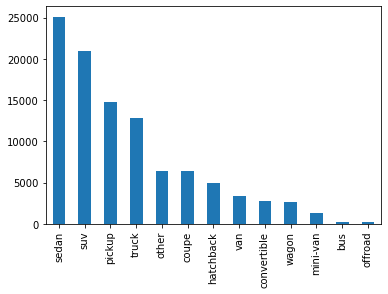

In [352]:
south.plot(kind='bar')


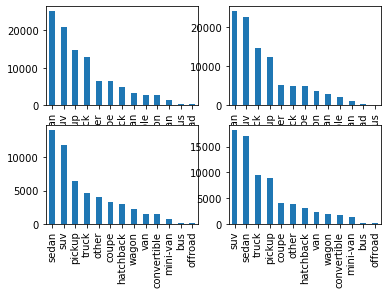

In [355]:
#define number of rows and columns for subplots
nrow=2
ncol=2

# make a list of all dataframes 
df_list = [south,west,northeast,midwest]
fig, axes = plt.subplots(nrow, ncol)

# plot counter
count=0
for r in range(nrow):
    for c in range(ncol):
        df_list[count].plot(ax=axes[r,c],kind='bar')
        count+=1

I want to try and plot them all on the same one, let's try it

In [356]:
west1=west.to_frame(name='west')

In [357]:
west1.rename(columns={'index':'type'},inplace=True)

In [358]:
west1

,west
sedan,24226
suv,22602
truck,14669
pickup,12324
other,5116
hatchback,4986
coupe,4828
wagon,3624
van,2949
convertible,2129


In [359]:
south1=south.to_frame(name='south')

In [360]:
south1

,south
sedan,25105
suv,20987
pickup,14716
truck,12837
other,6443
coupe,6425
hatchback,4946
van,3386
convertible,2737
wagon,2612


In [361]:
z=pd.merge(south1,west1,how='outer',left_index=True,right_index=True)

In [362]:
z

,south,west
bus,263,132
convertible,2737,2129
coupe,6425,4828
hatchback,4946,4986
mini-van,1309,997
offroad,195,367
other,6443,5116
pickup,14716,12324
sedan,25105,24226
suv,20987,22602


In [363]:
z.T

,bus,convertible,coupe,hatchback,mini-van,offroad,other,pickup,sedan,suv,truck,van,wagon
south,263,2737,6425,4946,1309,195,6443,14716,25105,20987,12837,3386,2612
west,132,2129,4828,4986,997,367,5116,12324,24226,22602,14669,2949,3624


<AxesSubplot:>

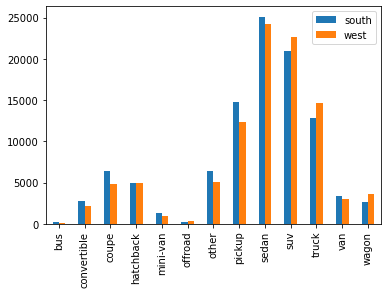

In [364]:
z.plot(kind='bar')

<AxesSubplot:>

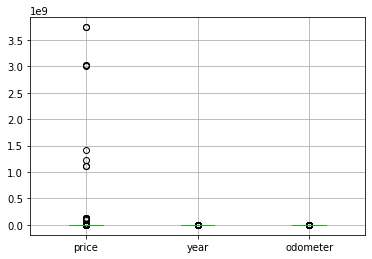

In [320]:
df1.boxplot()

Let's play with manufacturer stuff

In [367]:
df1.manufacturer.unique()

array(['honda', 'chevrolet', 'mercedes-benz', 'ram', 'nissan',
       'volkswagen', 'gmc', 'ford', 'bmw', 'cadillac', 'subaru', 'dodge',
       'jeep', 'tesla', 'mini', 'fiat', nan, 'toyota', 'rover', 'kia',
       'pontiac', 'chrysler', 'hyundai', 'buick', 'acura', 'mazda',
       'lincoln', 'mitsubishi', 'audi', 'mercury', 'lexus', 'porsche',
       'infiniti', 'jaguar', 'ferrari', 'alfa-romeo', 'volvo',
       'harley-davidson', 'saturn', 'datsun', 'aston-martin',
       'land rover', 'morgan', 'porche'], dtype=object)

In [368]:
df1.manufacturer.value_counts()

ford               63035
chevrolet          48540
toyota             30593
honda              19229
nissan             16872
jeep               16701
ram                15906
gmc                15074
bmw                13327
dodge              12088
mercedes-benz       9907
hyundai             9106
subaru              8743
volkswagen          8441
lexus               7551
kia                 7272
audi                6997
cadillac            6351
chrysler            5555
acura               5543
buick               5039
mazda               4907
infiniti            4428
lincoln             3998
volvo               3215
mitsubishi          3005
mini                2280
pontiac             2193
rover               1920
jaguar              1882
porsche             1270
mercury             1083
saturn              1056
tesla                837
alfa-romeo           829
fiat                 758
harley-davidson      135
ferrari              108
datsun                59
morgan                40


In [369]:
df_price_manufacturer=df1[["manufacturer", "price"]]
means = df_price_manufacturer.groupby('manufacturer')['price'].mean()
means=pd.DataFrame(means)
means.head()

,price
manufacturer,
acura,21494.232185
alfa-romeo,29435.794934
aston-martin,61136.619048
audi,25447.925540
bmw,29847.724694


In [372]:
means=means.sort_values('price')
means

,price
manufacturer,
mercury,6102.381348
saturn,7086.758523
pontiac,8422.935705
chrysler,11454.392799
honda,11795.035623
hyundai,12184.888755
fiat,12552.195251
kia,12818.039054
mazda,13590.515386


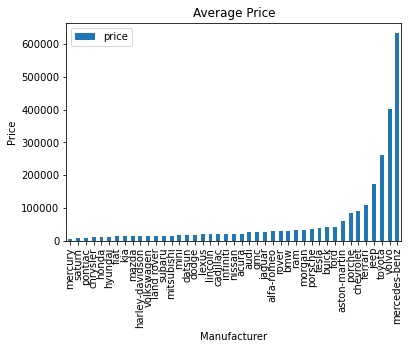

In [373]:
ax = means.plot(kind='bar')
ax.set_xlabel('Manufacturer')
ax.set_ylabel('Price')
ax.set_title('Average Price')
plt.show()

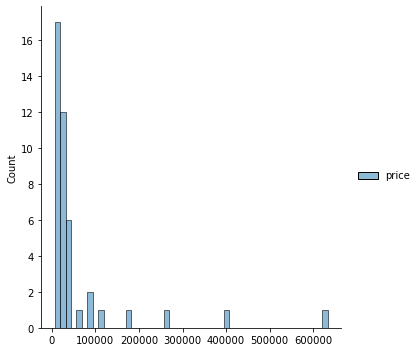

In [377]:
sns.displot(means,bins=50)
plt.show()

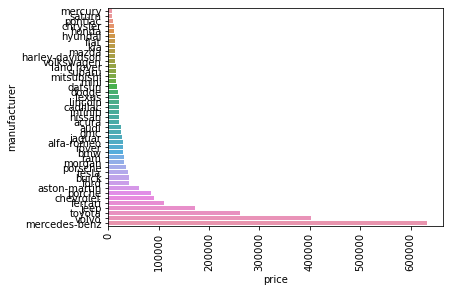

In [385]:
sns.barplot(y=means.index, x=means.price)

plt.xticks(rotation="vertical")

plt.show()

In [388]:
df1

,state_region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title,transmission,drive,size,type,color,state,posting_date,state,us_region,division
1,flagstaff / sedona,4850,2007.0,honda,odyssey ex,good,6 cylinders,gas,122100.0,clean,automatic,fwd,full-size,mini-van,blue,AZ,2021-05-04T09:40:28-0700,Arizona,West,Mountain
3,flagstaff / sedona,18990,2020.0,chevrolet,spark activ hatchback,good,NaN,gas,6395.0,clean,other,fwd,NaN,hatchback,black,AZ,2021-05-04T06:06:54-0700,Arizona,West,Mountain
4,flagstaff / sedona,32590,2015.0,mercedes-benz,gla-class gla 45,good,NaN,gas,34811.0,clean,other,NaN,NaN,other,black,AZ,2021-05-04T06:06:54-0700,Arizona,West,Mountain
5,flagstaff / sedona,27590,2011.0,mercedes-benz,cl-class cl 550,good,8 cylinders,gas,61445.0,clean,automatic,NaN,NaN,coupe,silver,AZ,2021-05-04T06:07:06-0700,Arizona,West,Mountain
6,flagstaff / sedona,31990,2017.0,ram,1500 crew cab express pickup,good,8 cylinders,gas,15498.0,clean,other,4wd,NaN,pickup,silver,AZ,2021-05-04T06:06:56-0700,Arizona,West,Mountain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426855,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,red,WY,2021-04-04T03:21:31-0600,Wyoming,West,Mountain
426856,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red,WY,2021-04-04T03:21:29-0600,Wyoming,West,Mountain
426857,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback,white,WY,2021-04-04T03:21:17-0600,Wyoming,West,Mountain
426858,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver,WY,2021-04-04T03:21:11-0600,Wyoming,West,Mountain


In [389]:
sns.scatterplot(y=df1.state, x=df1.price)
plt.show()

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

In [9]:
sns.set(style='white')
corr=df1.drop(columns=['price']).corr()
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
f,ax=plt.subplots(figsize=(18,15))
cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=.3,center=0,square=True,linewidths=.5,cbar_kws={'shrink':.5},annot=True)

NameError: name 'df1' is not defined

Let's have some fun with a local state

In [390]:
utah=df1[df1.state=='ut'].sort_values('state_region')

ValueError: cannot reindex from a duplicate axis

In [21]:
utah

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
385576,logan,44999,2020.0,jeep,wrangler unlimited sahara,NaN,NaN,gas,22219.0,clean,automatic,4wd,NaN,SUV,red,ut
385673,logan,19799,2015.0,dodge,durango sxt awd gas suv,NaN,NaN,gas,103402.0,clean,automatic,4wd,NaN,SUV,grey,ut
385674,logan,21999,2016.0,jeep,cherokee trailhawk 4x4 gas,NaN,NaN,gas,62768.0,clean,automatic,4wd,NaN,SUV,black,ut
385675,logan,36999,2017.0,ford,f150 xlt sport 4x4 half ton,NaN,NaN,gas,41900.0,clean,automatic,4wd,NaN,truck,black,ut
385676,logan,34999,2015.0,ram,1500 sport 4x4 1/2 ton,NaN,NaN,gas,61412.0,clean,automatic,4wd,NaN,truck,blue,ut
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386480,st george,18699,2015.0,toyota,camry,NaN,4 cylinders,gas,40532.0,clean,automatic,fwd,NaN,sedan,NaN,ut
386479,st george,7950,2011.0,ford,fusion se,excellent,NaN,gas,109000.0,clean,automatic,NaN,full-size,NaN,red,ut
386478,st george,55995,2015.0,gmc,sierra 2500hd available wifi,NaN,8 cylinders,diesel,68080.0,clean,automatic,4wd,NaN,NaN,silver,ut
386476,st george,32995,2017.0,ram,1500,NaN,8 cylinders,gas,51042.0,clean,automatic,4wd,NaN,NaN,black,ut


In [22]:
utah.reset_index(drop=True,inplace=True)

In [23]:
utah

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,logan,44999,2020.0,jeep,wrangler unlimited sahara,NaN,NaN,gas,22219.0,clean,automatic,4wd,NaN,SUV,red,ut
1,logan,19799,2015.0,dodge,durango sxt awd gas suv,NaN,NaN,gas,103402.0,clean,automatic,4wd,NaN,SUV,grey,ut
2,logan,21999,2016.0,jeep,cherokee trailhawk 4x4 gas,NaN,NaN,gas,62768.0,clean,automatic,4wd,NaN,SUV,black,ut
3,logan,36999,2017.0,ford,f150 xlt sport 4x4 half ton,NaN,NaN,gas,41900.0,clean,automatic,4wd,NaN,truck,black,ut
4,logan,34999,2015.0,ram,1500 sport 4x4 1/2 ton,NaN,NaN,gas,61412.0,clean,automatic,4wd,NaN,truck,blue,ut
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,st george,18699,2015.0,toyota,camry,NaN,4 cylinders,gas,40532.0,clean,automatic,fwd,NaN,sedan,NaN,ut
1146,st george,7950,2011.0,ford,fusion se,excellent,NaN,gas,109000.0,clean,automatic,NaN,full-size,NaN,red,ut
1147,st george,55995,2015.0,gmc,sierra 2500hd available wifi,NaN,8 cylinders,diesel,68080.0,clean,automatic,4wd,NaN,NaN,silver,ut
1148,st george,32995,2017.0,ram,1500,NaN,8 cylinders,gas,51042.0,clean,automatic,4wd,NaN,NaN,black,ut


In [24]:
missing = pd.concat([utah.isnull().sum(),100 * utah.isnull().mean()], axis=1)
missing.columns=['count','%']
missing.sort_values(by='count',ascending=False)

,count,%
size,849,73.826087
condition,666,57.913043
cylinders,374,32.521739
type,178,15.478261
drive,177,15.391304
paint_color,151,13.130435
manufacturer,70,6.086957
title_status,20,1.739130
model,17,1.478261
fuel,9,0.782609


In [25]:
utah_price_manufacturer=utah[["manufacturer", "price"]]
means = utah_price_manufacturer.groupby('manufacturer')['price'].mean()
means=pd.DataFrame(means)
means=means.sort_values('price')
means
means.sample(20)

,price
manufacturer,
dodge,12373.659574
chrysler,16819.000000
volkswagen,12201.192308
honda,13561.971429
buick,17831.555556
subaru,14661.052632
jaguar,14497.000000
mini,16998.333333
fiat,5823.750000


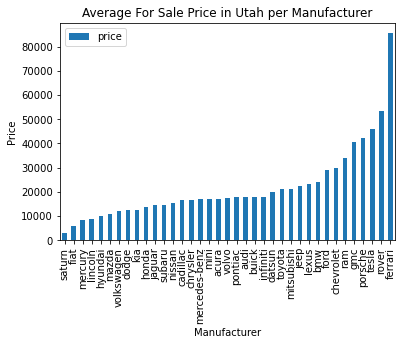

In [31]:
ax = means.plot(kind='bar')
ax.set_xlabel('Manufacturer')
ax.set_ylabel('Price')
ax.set_title('Average For Sale Price in Utah per Manufacturer')
plt.show()

In [32]:
utah

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,logan,44999,2020.0,jeep,wrangler unlimited sahara,NaN,NaN,gas,22219.0,clean,automatic,4wd,NaN,SUV,red,ut
1,logan,19799,2015.0,dodge,durango sxt awd gas suv,NaN,NaN,gas,103402.0,clean,automatic,4wd,NaN,SUV,grey,ut
2,logan,21999,2016.0,jeep,cherokee trailhawk 4x4 gas,NaN,NaN,gas,62768.0,clean,automatic,4wd,NaN,SUV,black,ut
3,logan,36999,2017.0,ford,f150 xlt sport 4x4 half ton,NaN,NaN,gas,41900.0,clean,automatic,4wd,NaN,truck,black,ut
4,logan,34999,2015.0,ram,1500 sport 4x4 1/2 ton,NaN,NaN,gas,61412.0,clean,automatic,4wd,NaN,truck,blue,ut
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,st george,18699,2015.0,toyota,camry,NaN,4 cylinders,gas,40532.0,clean,automatic,fwd,NaN,sedan,NaN,ut
1146,st george,7950,2011.0,ford,fusion se,excellent,NaN,gas,109000.0,clean,automatic,NaN,full-size,NaN,red,ut
1147,st george,55995,2015.0,gmc,sierra 2500hd available wifi,NaN,8 cylinders,diesel,68080.0,clean,automatic,4wd,NaN,NaN,silver,ut
1148,st george,32995,2017.0,ram,1500,NaN,8 cylinders,gas,51042.0,clean,automatic,4wd,NaN,NaN,black,ut


In [44]:
#average price per region
avg=utah.groupby('region')['price'].mean()
avg

region
logan               33718.618421
ogden-clearfield    14823.671053
provo / orem        14708.080000
salt lake city      32124.913402
st george           16379.709945
Name: price, dtype: float64

In [29]:
type(avg)

pandas.core.series.Series

In [47]:
avg_sorted=avg.sort_values()

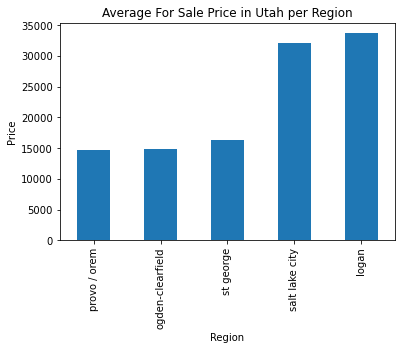

In [48]:
ax = avg_sorted.plot(kind='bar')
ax.set_xlabel('Region')
ax.set_ylabel('Price')
ax.set_title('Average For Sale Price in Utah per Region')
plt.show()

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'odometer'}>, <AxesSubplot:>]],
      dtype=object)

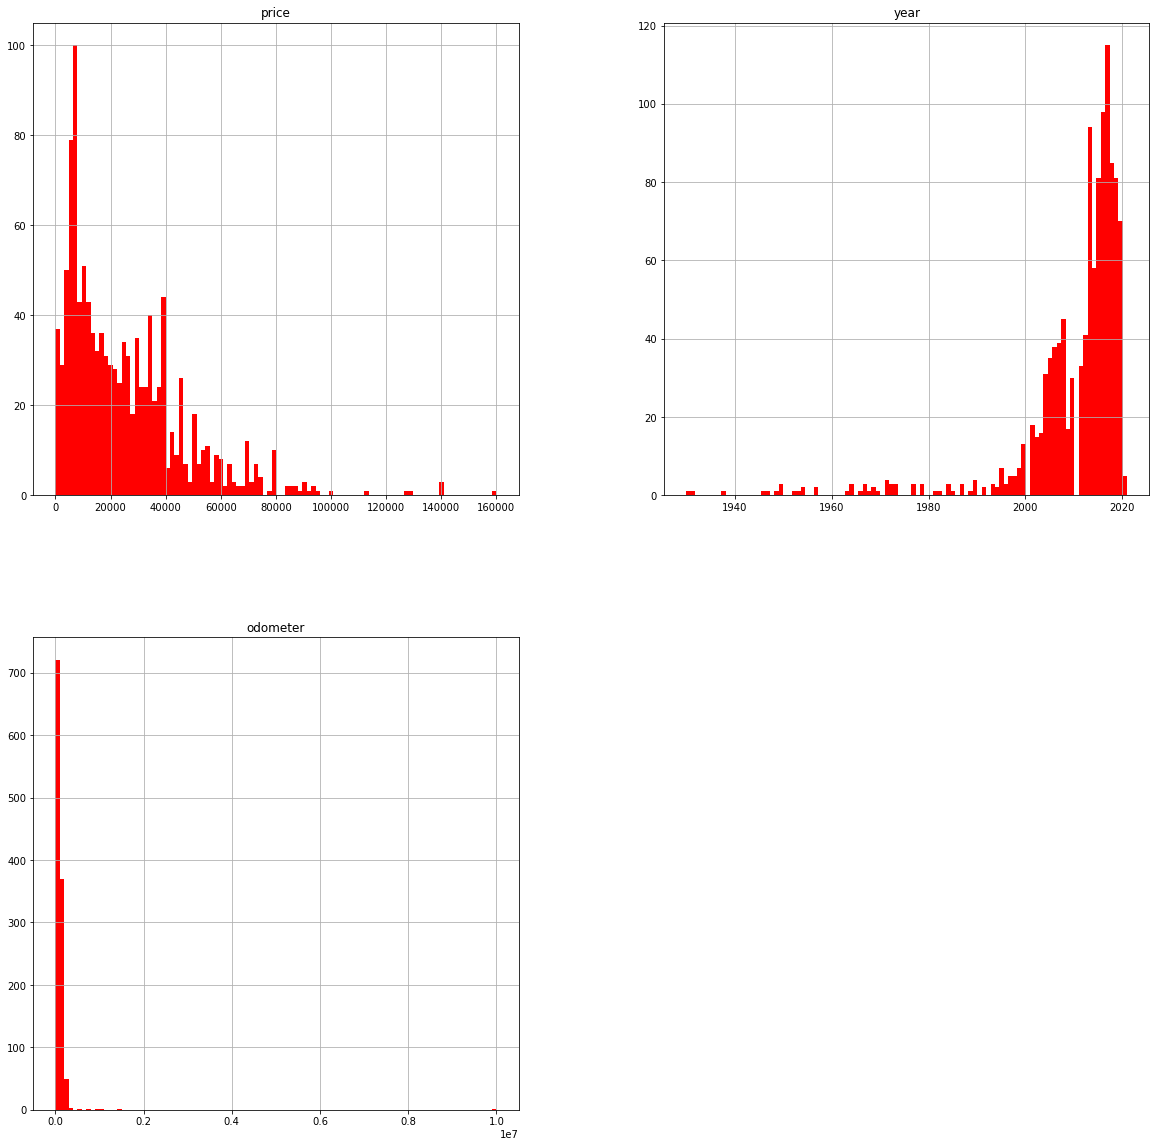

In [107]:
utah.hist(bins= 100, figsize = (20,20), color = 'r')

<AxesSubplot:xlabel='type', ylabel='count'>

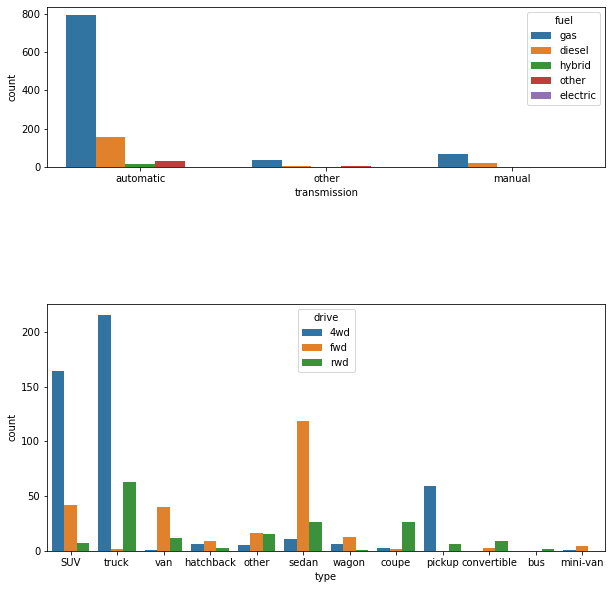

In [109]:
plt.figure(figsize=[10,10])
plt.subplot(311)
sns.countplot(x = 'transmission', hue = 'fuel', data = utah)
plt.subplot(212)
sns.countplot(x = 'type', hue = 'drive', data = utah)

In [34]:
utah.region.unique()

array(['logan', 'ogden-clearfield', 'provo / orem', 'salt lake city',
       'st george'], dtype=object)

In [40]:
type(utah)

pandas.core.frame.DataFrame

In [43]:
utah['region']

0           logan
1           logan
2           logan
3           logan
4           logan
          ...    
1145    st george
1146    st george
1147    st george
1148    st george
1149    st george
Name: region, Length: 1150, dtype: object